In [12]:
import numpy as np
from matplotlib.pyplot import subplots, cm
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table

from sklearn.svm import SVC
from ISLP.svm import plot as plot_svm
from sklearn.metrics import RocCurveDisplay

In [5]:
roc_curve = RocCurveDisplay.from_estimator

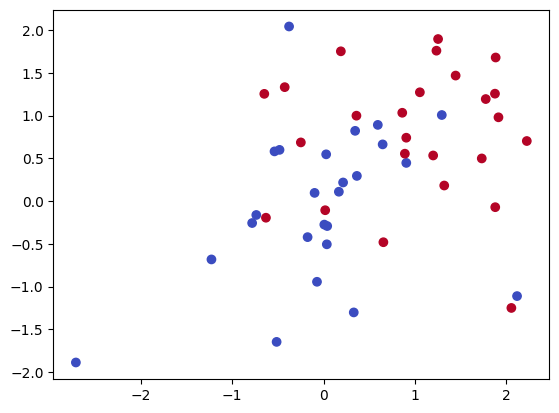

In [6]:
rng = np.random.default_rng(1)
X = rng.standard_normal((50,2))
y = np.array([-1]*25+[1]*25)
X[y==1] += 1
fig, ax = subplots()
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm.coolwarm)

In [7]:
svm_linear = SVC(C=10,kernel='linear')
svm_linear.fit(X,y)

SVC(C=10, kernel='linear')

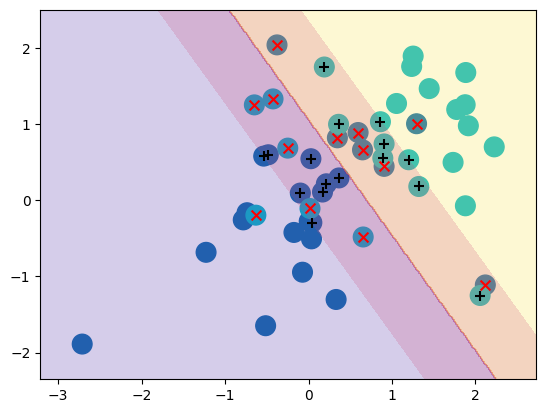

In [8]:
fig, ax =subplots()
plot_svm(X,y,svm_linear,ax=ax) # Decision function. Based on example on sklearn docs

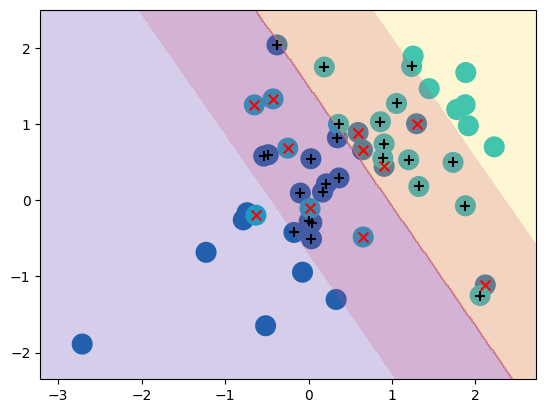

In [9]:
svm_linear_small = SVC(C=0.1,kernel='linear')
svm_linear_small.fit(X,y)
fig, ax =subplots()
plot_svm(X,y,svm_linear_small,ax=ax) # Decision function. Based on example on sklearn docs

In [10]:
svm_linear.coef_

array([[1.17303943, 0.77348227]])

In [13]:
kfold = skm.KFold(5,random_state=0,shuffle=True)
grid = skm.GridSearchCV(svm_linear,{'C':[0.001,0.01,0.1,1,5,10,100]},refit=True,cv=kfold,scoring='accuracy')
grid.fit(X,y)
grid.best_params_

{'C': 1}

In [14]:
grid.cv_results_[('mean_test_score')]

array([0.46, 0.46, 0.72, 0.74, 0.74, 0.74, 0.74])

In [15]:
X_test = rng.standard_normal((20,2))
y_test = np.array([-1]*10+[1]*10)
X_test[y_test==1] += 1

In [17]:
best_ = grid.best_estimator_
y_test_hat = best_.predict(X_test)
confusion_table(y_test_hat,y_test)

Truth,-1,1
Predicted,,
-1,8,4
1,2,6


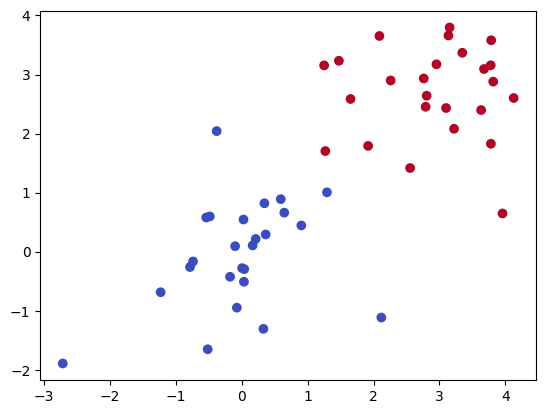

In [18]:
X[y==1] += 1.9
fig, ax = subplots()
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm.coolwarm)

In [20]:
svm_ = SVC(C=1e5, kernel='linear').fit(X,y)
y_hat = svm_.predict(X)
confusion_table(y_hat,y)

Truth,-1,1
Predicted,,
-1,25,0
1,0,25


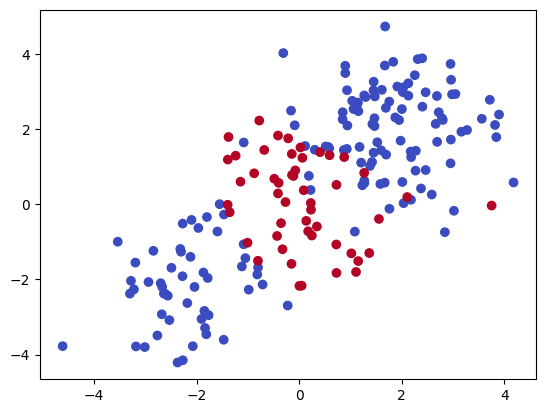

In [25]:
# Support Vector Machines
X = rng.standard_normal((200,2))
X[:100] += 2
X[100:150]-= 2
y = np.array([1]*150+[2]*50)

fig, ax = subplots()
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm.coolwarm)

In [26]:
(X_train,X_test,y_train,y_test) = skm.train_test_split(X,y,test_size=0.5,random_state=0)
svm_rbf = SVC(kernel='rbf',gamma=1,C=1)
svm_rbf.fit(X_train,y_train)

SVC(C=1, gamma=1)

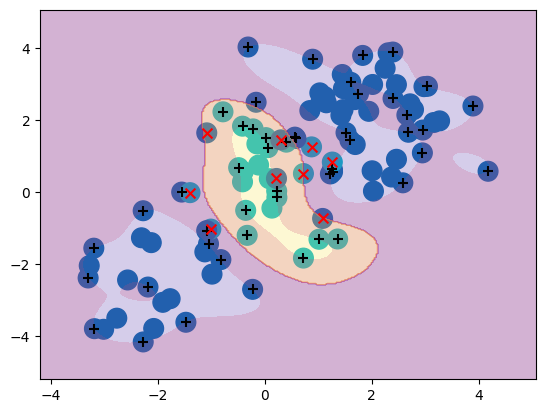

In [27]:
fig, ax = subplots()
plot_svm(X_train,y_train,svm_rbf,ax=ax)

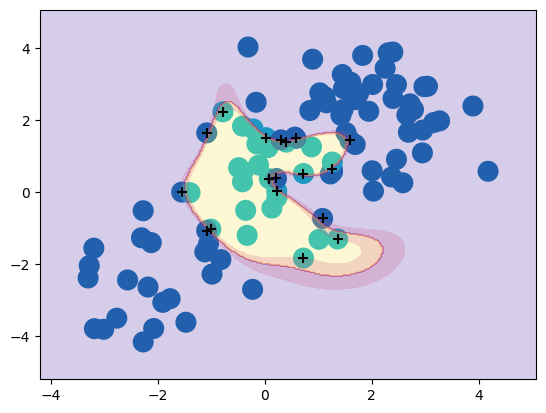

In [28]:
(X_train,X_test,y_train,y_test) = skm.train_test_split(X,y,test_size=0.5,random_state=0)
svm_rbf = SVC(kernel='rbf',gamma=1,C=1e5)
svm_rbf.fit(X_train,y_train)
fig, ax = subplots()
plot_svm(X_train,y_train,svm_rbf,ax=ax)

In [31]:
kfold = skm.KFold(5,random_state=0,shuffle=True)
grid = skm.GridSearchCV(svm_rbf,{'C':[0.1,1,10,100,1000],'gamma':[0.5,1,2,3,4]},refit=True,cv=kfold,scoring='accuracy')
grid.fit(X_train,y_train)
grid.best_params_

{'C': 100, 'gamma': 1}

Truth,1,2
Predicted,,
1,70,9
2,5,16


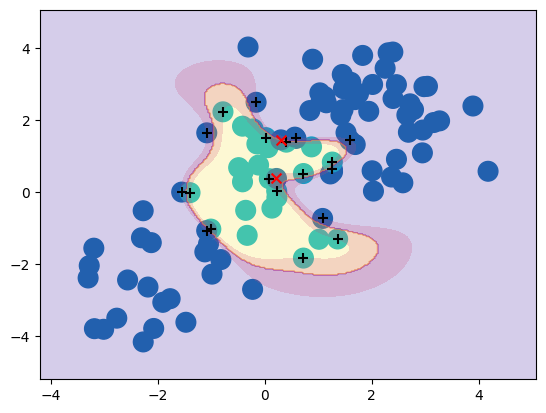

In [34]:
best_svm = grid.best_estimator_
fig, ax = subplots()
plot_svm(X_train,y_train,best_svm,ax=ax)

y_hat_test = best_svm.predict(X_test)
confusion_table(y_hat_test,y_test)


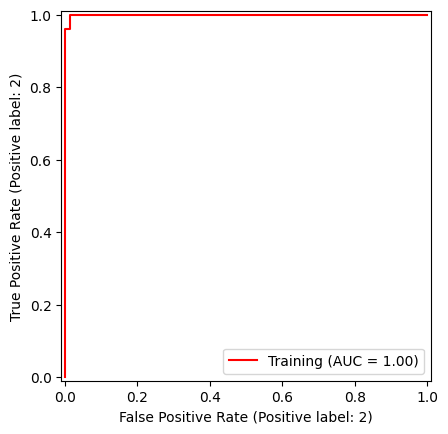

In [35]:
fig,ax = subplots()
roc_curve(best_svm,X_train,y_train,name='Training',color='r',ax=ax)

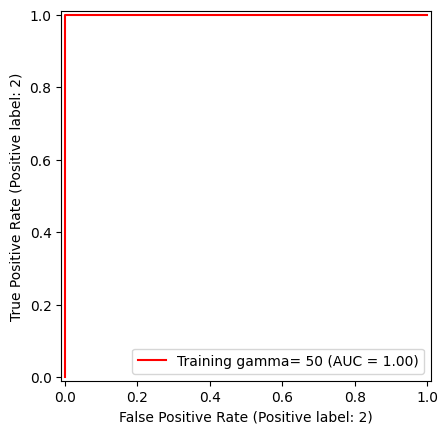

In [38]:
svm_flex = SVC(kernel='rbf',gamma=50,C=1)
svm_flex.fit(X_train,y_train)
fig,ax = subplots()
roc_curve(svm_flex,X_train,y_train,name='Training gamma= 50',color='r',ax=ax)

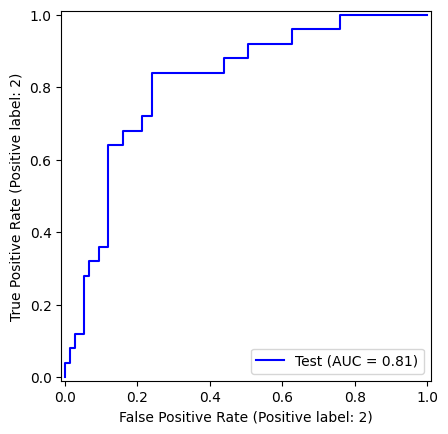

In [41]:
fig,ax = subplots()
roc_curve(svm_flex,X_test,y_test,name = 'Test',color='b',ax=ax)

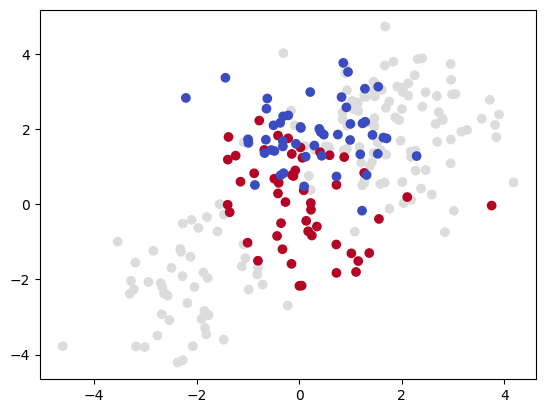

In [44]:
# SVM Multiple Classes
rng = np.random.default_rng(123)
X = np.vstack([X,rng.standard_normal((50,2))])
y = np.hstack([y,[0]*50])
X[y==0,1]+=2
fig,ax = subplots()
ax.scatter(X[:,0],X[:,1],c=y,cmap=cm.coolwarm)

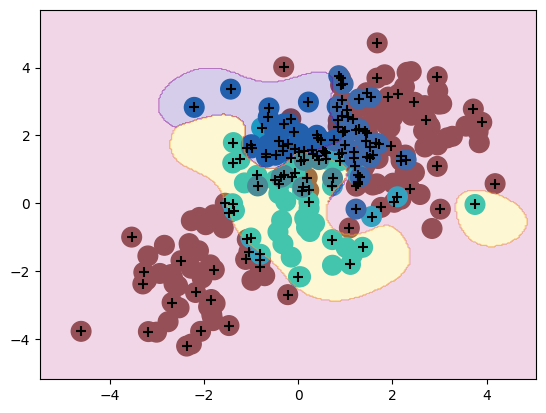

In [46]:
svm_rbf_3 = SVC(kernel='rbf',C=10,gamma=1,decision_function_shape='ovo')
svm_rbf_3.fit(X,y)
fig,ax = subplots()
plot_svm(X,y,svm_rbf_3,scatter_cmap=cm.tab10,ax=ax)

In [47]:
# Gene Data
Khan = load_data('Khan')
Khan['xtrain'].shape, Khan['xtest'].shape

((63, 2308), (20, 2308))

In [48]:
khan_linear = SVC(kernel='linear',C=10)
khan_linear.fit(Khan['xtrain'],Khan['ytrain'])
confusion_table(khan_linear.predict(Khan['xtrain']),Khan['ytrain'])

Truth,1,2,3,4
Predicted,,,,
1,8,0,0,0
2,0,23,0,0
3,0,0,12,0
4,0,0,0,20


In [50]:
confusion_table(khan_linear.predict(Khan['xtest']),Khan['ytest'])

Truth,1,2,3,4
Predicted,,,,
1,3,0,0,0
2,0,6,2,0
3,0,0,4,0
4,0,0,0,5
